<a href="https://colab.research.google.com/github/chetansolanke14/DeepLearning_Project/blob/master/Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd

In [0]:
np.random.seed(0)

In [249]:
#Data Initilization
#Data source German Traffic sign 
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [250]:
!ls german-traffic-signs/
#All files are in pickle format

signnames.csv  test.p  train.p	valid.p


In [251]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)
  
print(type(train_data))

X_train,y_train=train_data['features'],train_data['labels']
X_val,y_val=val_data['features'],val_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

<class 'dict'>


In [252]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape,y_val.shape)


(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3) (4410,)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [293]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [0]:
import random

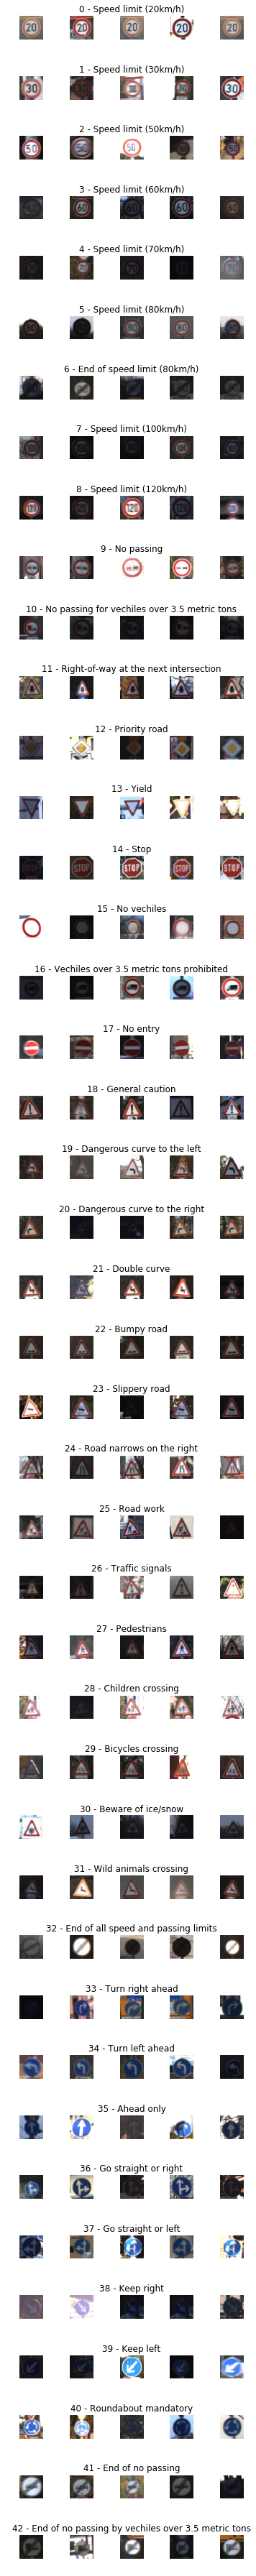

In [256]:
  num_of_samples=[]
 
  cols = 5
  num_classes = 43
 
  fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
  fig.tight_layout()
 
  for i in range(cols):
      for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

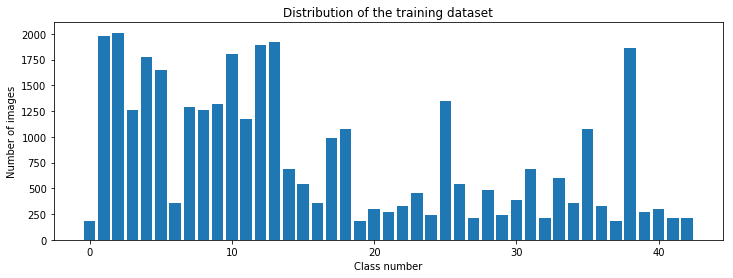

In [257]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


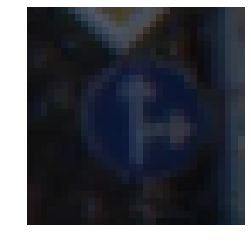

In [258]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


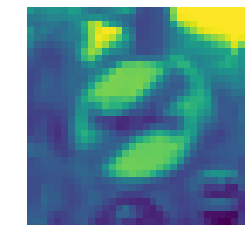

In [259]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img


img=grayscale(X_train[100])
plt.imshow(img)
plt.axis("off")

print(img.shape)

(32, 32)


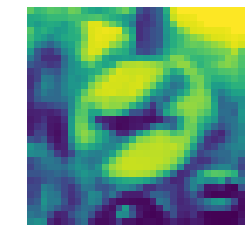

In [260]:
#Histogram Equalization: lighting of the effect : bright,contrast

def equalize(img):
  img=cv2.equalizeHist(img)  #Work on grayscale images only
  return img
  
  
img=equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

In [0]:
X_train=np.array(list(map(preprocessing,X_train)))
X_test=np.array(list(map(preprocessing,X_test)))
X_val=np.array(list(map(preprocessing,X_val)))

(34799, 32, 32)


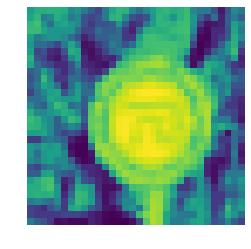

In [263]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

(12630, 32, 32)


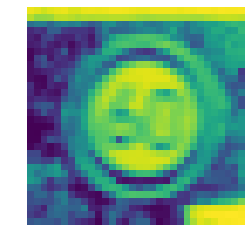

In [264]:
plt.imshow(X_test[random.randint(0,len(X_test)-1)])
plt.axis("off")
print(X_test.shape)

In [0]:
X_train=X_train.reshape(34799,32,32,1)
X_test=X_test.reshape(12630,32,32,1)
X_val=X_val.reshape(4410,32,32,1)

In [266]:
print(X_train.shape,X_val.shape,X_test.shape)

(34799, 32, 32, 1) (4410, 32, 32, 1) (12630, 32, 32, 1)


In [0]:
#Data augmentaion process

from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(width_shift_range=0.1,
                  height_shift_range=0.1,
                  zoom_range=0.2,
                  shear_range=0.1,
                  rotation_range=10)

datagen.fit(X_train)

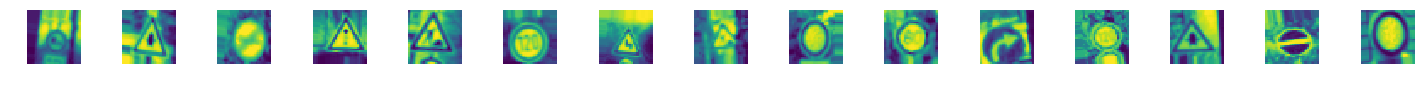

In [268]:
batches=datagen.flow(X_train,y_train,batch_size=20)

X_batch,y_batch=next(batches)

#Plot

fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(0.5))
  
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  #Compile Model
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model  

In [271]:
model =modified_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 480)               0         
__________

In [272]:
#history=model.fit(X_train,y_train,epochs=10, validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)
history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val),shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.9093 - acc: 0.7324 - val_loss: 0.1155 - val_acc: 0.9603
Epoch 2/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2174 - acc: 0.9312 - val_loss: 0.0428 - val_acc: 0.9857
Epoch 3/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.1420 - acc: 0.9563 - val_loss: 0.0442 - val_acc: 0.9868
Epoch 4/10
2000/2000 [==============================] - 33s 17ms/step - loss: 0.1122 - acc: 0.9650 - val_loss: 0.0614 - val_acc: 0.9841
Epoch 5/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.0940 - acc: 0.9710 - val_loss: 0.0459 - val_acc: 0.9893
Epoch 6/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.0873 - acc: 0.9733 - val_loss: 0.0484 - val_acc: 0.9853
Epoch 7/10
2000/2000 [==============================] - 33s 17ms/step - loss: 0.0744 - acc: 0.9775 - val_loss: 0.0471 - val_acc: 0.9862
Epoch 8/10
2000/2000 [==========================

Text(0.5, 1.0, 'epoch')

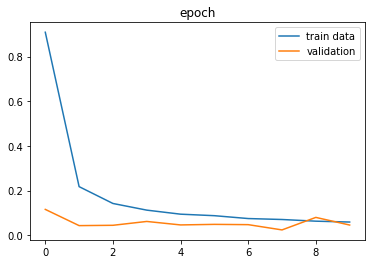

In [273]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train data','validation'])
plt.title("loss")
plt.title("epoch")

Text(0.5, 1.0, 'epoch')

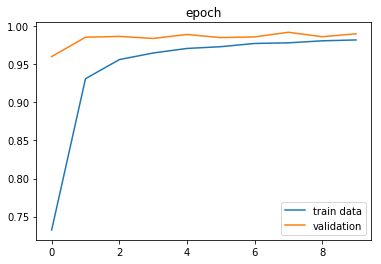

In [274]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train data','validation'])
plt.title("acc")
plt.title("epoch")

In [275]:
score =model.evaluate(X_test,y_test, verbose=0)

print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.10989004481710665
Test Accuracy: 0.9702296120820306


In [0]:
#Need to fine tune the model: Issued todel: accuracy is not high and data overfitting
#1. Decrese learning rate -91%
#2. INcresing the number of filter in conv layer to extract more features -92%
#3. Add extra convolution layer use less computation power-94%
#4. Add dropout layer to prevent -96%

In [0]:
# https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

# https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

# https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

# https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

# https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg

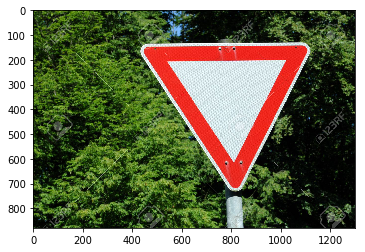

In [281]:
#Testing 
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
  
  

(32, 32)


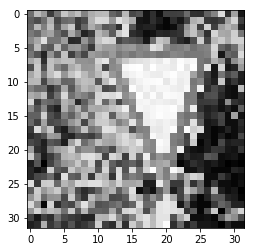

In [282]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [304]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))
data['SignName'][data['ClassId']==int(model.predict_classes(img))]

predicted sign: [13]


13    Yield
Name: SignName, dtype: object

In [302]:
#Need to include more technique to improve the performances
#Alter image and transform into different image like rotation,zoom,zoo+transform,i.e Data augmentation

data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


1    Speed limit (30km/h)
Name: SignName, dtype: object